In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# for Classifcation
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, \
    precision_recall_fscore_support,precision_score,recall_score


In [2]:
df1=pd.read_csv(r"C:\Users\El-Wattaneya\Desktop\ML Project Classififcation\Spotify\spotify_songs.csv")
df1

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


# **Data Evaluation**

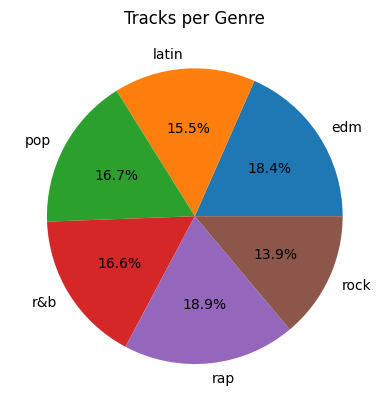

In [3]:
genre_tracks = df1.groupby('playlist_genre')['track_name'].nunique()

plt.pie(genre_tracks, labels=genre_tracks.index, autopct='%1.1f%%')
plt.title('Tracks per Genre')
plt.show()

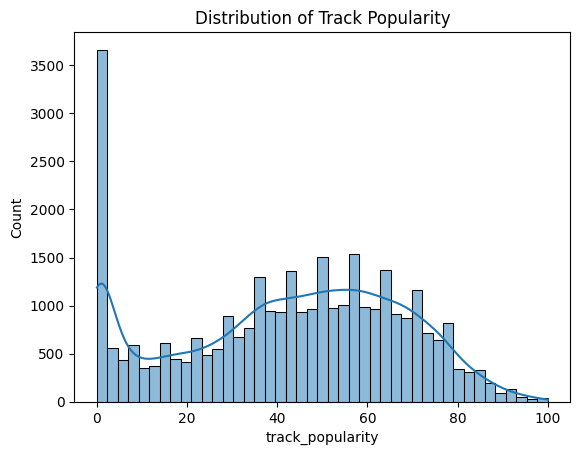

In [4]:
sns.histplot(df1['track_popularity'], kde=True)
plt.title('Distribution of Track Popularity')
plt.show()


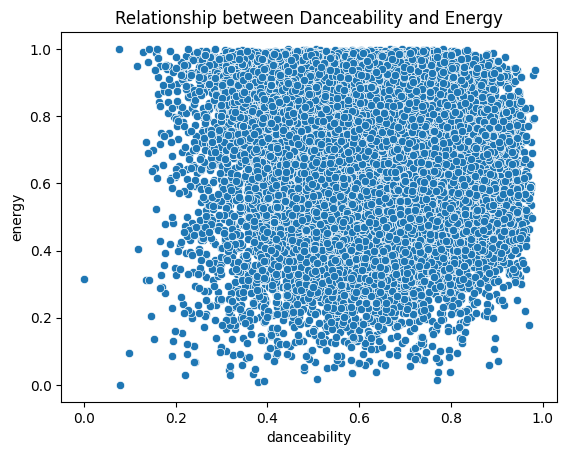

In [5]:
sns.scatterplot(x='danceability', y='energy', data=df1)
plt.title('Relationship between Danceability and Energy')
plt.show()


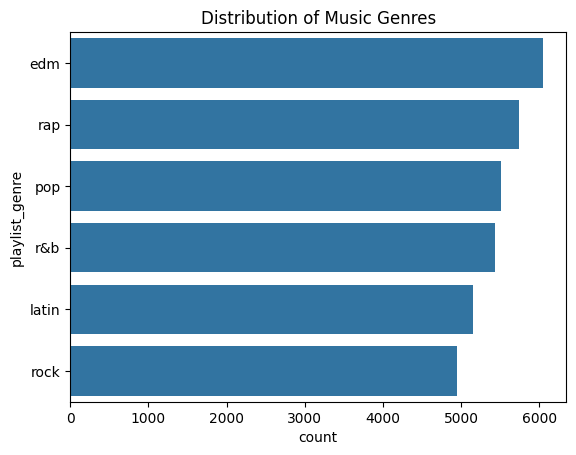

In [6]:
sns.countplot(y='playlist_genre', data=df1, order=df1['playlist_genre'].value_counts().index)
plt.title('Distribution of Music Genres')
plt.show()


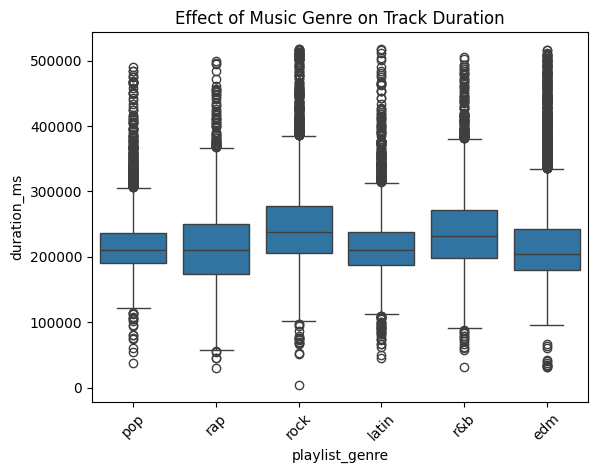

In [7]:
sns.boxplot(x='playlist_genre', y='duration_ms', data=df1)
plt.title('Effect of Music Genre on Track Duration')
plt.xticks(rotation=45)
plt.show()


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

# **Data Preprocessing**

- Check Duplicated and Remove it 
- Check NaN Values
- remove unwanted columns


In [9]:
df1.duplicated().sum()


0

In [10]:
df1.describe(include="all")

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833,32828,32828,32833.000000,32833,32828,32833,32833,32833,32833,...,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
unique,28356,23449,10692,NaN,22545,19743,4530,449,471,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,7BKLCZ1jbUBVqRi2FVlTVw,Poison,Martin Garrix,NaN,5L1xcowSxwzFUSJzvyMp48,Greatest Hits,2020-01-10,Indie Poptimism,4JkkvMpVl4lSioqQjeAL0q,edm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,10,22,161,NaN,42,139,270,308,247,6043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,42.477081,NaN,NaN,NaN,NaN,NaN,NaN,...,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,NaN,NaN,NaN,24.984074,NaN,NaN,NaN,NaN,NaN,NaN,...,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,NaN,NaN,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,NaN,NaN,NaN,62.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000


In [11]:
df1.isna().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [12]:
df1 = df1.dropna()
df1.describe(include="all")

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32828,32828,32828,32828.000000,32828,32828,32828,32828,32828,32828,...,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000
unique,28352,23449,10692,NaN,22543,19743,4529,449,471,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,7BKLCZ1jbUBVqRi2FVlTVw,Poison,Martin Garrix,NaN,5L1xcowSxwzFUSJzvyMp48,Greatest Hits,2020-01-10,Indie Poptimism,4JkkvMpVl4lSioqQjeAL0q,edm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,10,22,161,NaN,42,139,270,308,247,6043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,42.483551,NaN,NaN,NaN,NaN,NaN,NaN,...,5.373949,-6.719529,0.565737,0.107053,0.175352,0.084760,0.190175,0.510556,120.883642,225796.829779
std,NaN,NaN,NaN,24.980476,NaN,NaN,NaN,NaN,NaN,NaN,...,3.611572,2.988641,0.495667,0.101307,0.219644,0.224245,0.154313,0.233152,26.903632,59836.492346
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,NaN,NaN,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,-8.171250,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.961000,187804.500000
50%,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,NaN,NaN,NaN,62.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918250,253581.250000


In [13]:
print(df1['track_name'].isnull())

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: track_name, Length: 32828, dtype: bool


In [14]:
print (df1.isna().any(axis=1))

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Length: 32828, dtype: bool


In [15]:
df1.isna().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [16]:
num_rows = df1.shape[0]
print(f" Num of rows in dataset {num_rows}")



 Num of rows in dataset 32828


In [17]:
#بتأكد في قيم متكررة ولا لا
print(len(df1['track_album_id'].unique()))
print(len(df1['track_album_id']))

22543
32828


In [18]:
columns_to_drop = ['track_id', 'playlist_id', 'track_album_id','duration_ms']

df1 = df1.drop(columns=columns_to_drop, axis=1)

df1

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036
1,Memories - Dillon Francis Remix,Maroon 5,67,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972
2,All the Time - Don Diablo Remix,Zara Larsson,70,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Call You Mine - The Remixes,2019-07-19,Pop Remix,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,City Of Lights - Official Radio Edit,Lush & Simon,42,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,edm,progressive electro house,0.428,0.922,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170
32829,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,edm,progressive electro house,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041
32830,Sweet Surrender - Radio Edit,Starkillers,14,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,edm,progressive electro house,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989
32831,Only For You - Maor Levi Remix,Mat Zo,15,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,edm,progressive electro house,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008


In [19]:
#Get max and Min of years
min_release_year = df1['track_album_release_date'].min()
max_release_year = df1['track_album_release_date'].max()

print(f"The range of track album release years is from {min_release_year} to {max_release_year}.")


The range of track album release years is from 1957-01-01 to 2020-01-29.


In [20]:
#Convert date to years only
df1['track_album_release_date'] = pd.to_datetime(df1['track_album_release_date'], errors='coerce')
df1['track_album_release_year'] = df1['track_album_release_date'].dt.year.astype('Int64')

min_release_year = df1['track_album_release_year'].min()
max_release_year = df1['track_album_release_year'].max()

print(f"The range of track album release years is from {min_release_year} to {max_release_year}.")


The range of track album release years is from 1957 to 2020.


In [21]:
#make range years between 2000 to 2020
df1 = df1[(df1['track_album_release_year'] >= 1985) & (df1['track_album_release_year'] <= 2020)]

min_release_year = df1['track_album_release_year'].min()
max_release_year = df1['track_album_release_year'].max()

print(f"The range of track album release years is from {min_release_year} to {max_release_year}.")



The range of track album release years is from 1985 to 2020.


In [22]:
df1.drop('track_album_release_date', axis=1, inplace=True)


In [23]:
df1

,track_name,track_artist,track_popularity,track_album_name,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_album_release_year
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury...,Pop Remix,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,2019
1,Memories - Dillon Francis Remix,Maroon 5,67,Memories (Dillon Francis Remix),Pop Remix,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,2019
2,All the Time - Don Diablo Remix,Zara Larsson,70,All the Time (Don Diablo Remix),Pop Remix,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,2019
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Call You Mine - The Remixes,Pop Remix,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,2019
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Someone You Loved (Future Humans Remix),Pop Remix,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,City Of Lights - Official Radio Edit,Lush & Simon,42,City Of Lights (Vocal Mix),♥ EDM LOVE 2020,edm,progressive electro house,0.428,0.922,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,2014
32829,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,Closer Remixed,♥ EDM LOVE 2020,edm,progressive electro house,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,2013
32830,Sweet Surrender - Radio Edit,Starkillers,14,Sweet Surrender (Radio Edit),♥ EDM LOVE 2020,edm,progressive electro house,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,2014
32831,Only For You - Maor Levi Remix,Mat Zo,15,Only For You (Remixes),♥ EDM LOVE 2020,edm,progressive electro house,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,2014


In [24]:
# feature scaling ##############################################
#تحويل القيم في نطاق محدد بين 0 و 1 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1[['track_popularity','loudness','key','tempo','instrumentalness']] = scaler.fit_transform(df1[['track_popularity','loudness','key','tempo','instrumentalness']])
#values of instrumentalness must be between 0 and 1

In [25]:
df1

,track_name,track_artist,track_popularity,track_album_name,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_album_release_year
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,0.66,I Don't Care (with Justin Bieber) [Loud Luxury...,Pop Remix,pop,dance pop,0.748,0.916,0.545455,0.920791,1,0.0583,0.102000,0.000000,0.0653,0.5180,0.509673,2019
1,Memories - Dillon Francis Remix,Maroon 5,0.67,Memories (Dillon Francis Remix),Pop Remix,pop,dance pop,0.726,0.815,1.000000,0.871719,1,0.0373,0.072400,0.004235,0.3570,0.6930,0.417524,2019
2,All the Time - Don Diablo Remix,Zara Larsson,0.70,All the Time (Don Diablo Remix),Pop Remix,pop,dance pop,0.675,0.931,0.090909,0.904020,0,0.0742,0.079400,0.000023,0.1100,0.6130,0.517908,2019
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,0.60,Call You Mine - The Remixes,Pop Remix,pop,dance pop,0.718,0.930,0.636364,0.896749,1,0.1020,0.028700,0.000009,0.2040,0.2770,0.509338,2019
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,0.69,Someone You Loved (Future Humans Remix),Pop Remix,pop,dance pop,0.650,0.833,0.090909,0.877961,1,0.0359,0.080300,0.000000,0.0833,0.7250,0.517775,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,City Of Lights - Official Radio Edit,Lush & Simon,0.42,City Of Lights (Vocal Mix),♥ EDM LOVE 2020,edm,progressive electro house,0.428,0.922,0.181818,0.938024,1,0.0936,0.076600,0.000000,0.0668,0.2100,0.535291,2014
32829,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,0.20,Closer Remixed,♥ EDM LOVE 2020,edm,progressive electro house,0.522,0.786,0.000000,0.882374,1,0.0420,0.001710,0.004296,0.3750,0.4000,0.534752,2013
32830,Sweet Surrender - Radio Edit,Starkillers,0.14,Sweet Surrender (Radio Edit),♥ EDM LOVE 2020,edm,progressive electro house,0.529,0.821,0.545455,0.873190,0,0.0481,0.108000,0.000001,0.1500,0.4360,0.534535,2014
32831,Only For You - Maor Levi Remix,Mat Zo,0.15,Only For You (Remixes),♥ EDM LOVE 2020,edm,progressive electro house,0.626,0.888,0.181818,0.905512,1,0.1090,0.007920,0.127767,0.3430,0.3080,0.534614,2014


In [26]:
popularity_stats = df1['track_popularity'].describe()

print(popularity_stats)


count    31151.000000
mean         0.422245
std          0.249727
min          0.000000
25%          0.240000
50%          0.450000
75%          0.620000
max          1.000000
Name: track_popularity, dtype: float64


In [27]:
# remove track_popularity = 0
df1 = df1[df1['track_popularity'] != 0]
df1

,track_name,track_artist,track_popularity,track_album_name,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_album_release_year
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,0.66,I Don't Care (with Justin Bieber) [Loud Luxury...,Pop Remix,pop,dance pop,0.748,0.916,0.545455,0.920791,1,0.0583,0.102000,0.000000,0.0653,0.5180,0.509673,2019
1,Memories - Dillon Francis Remix,Maroon 5,0.67,Memories (Dillon Francis Remix),Pop Remix,pop,dance pop,0.726,0.815,1.000000,0.871719,1,0.0373,0.072400,0.004235,0.3570,0.6930,0.417524,2019
2,All the Time - Don Diablo Remix,Zara Larsson,0.70,All the Time (Don Diablo Remix),Pop Remix,pop,dance pop,0.675,0.931,0.090909,0.904020,0,0.0742,0.079400,0.000023,0.1100,0.6130,0.517908,2019
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,0.60,Call You Mine - The Remixes,Pop Remix,pop,dance pop,0.718,0.930,0.636364,0.896749,1,0.1020,0.028700,0.000009,0.2040,0.2770,0.509338,2019
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,0.69,Someone You Loved (Future Humans Remix),Pop Remix,pop,dance pop,0.650,0.833,0.090909,0.877961,1,0.0359,0.080300,0.000000,0.0833,0.7250,0.517775,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,City Of Lights - Official Radio Edit,Lush & Simon,0.42,City Of Lights (Vocal Mix),♥ EDM LOVE 2020,edm,progressive electro house,0.428,0.922,0.181818,0.938024,1,0.0936,0.076600,0.000000,0.0668,0.2100,0.535291,2014
32829,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,0.20,Closer Remixed,♥ EDM LOVE 2020,edm,progressive electro house,0.522,0.786,0.000000,0.882374,1,0.0420,0.001710,0.004296,0.3750,0.4000,0.534752,2013
32830,Sweet Surrender - Radio Edit,Starkillers,0.14,Sweet Surrender (Radio Edit),♥ EDM LOVE 2020,edm,progressive electro house,0.529,0.821,0.545455,0.873190,0,0.0481,0.108000,0.000001,0.1500,0.4360,0.534535,2014
32831,Only For You - Maor Levi Remix,Mat Zo,0.15,Only For You (Remixes),♥ EDM LOVE 2020,edm,progressive electro house,0.626,0.888,0.181818,0.905512,1,0.1090,0.007920,0.127767,0.3430,0.3080,0.534614,2014


In [28]:
popularity_stats = df1['track_popularity'].describe()

print(popularity_stats)

count    28519.000000
mean         0.461214
std          0.223933
min          0.010000
25%          0.310000
50%          0.480000
75%          0.630000
max          1.000000
Name: track_popularity, dtype: float64


In [29]:
# تقريب الأرقام في عمود track_popularity إلى رقمين بعد الفاصلة
df1['track_popularity'] = df1['track_popularity'].round(2)

# طباعة بعض الصفوف للتحقق من التحديث
print(df1[['track_popularity']].head())


   track_popularity
0              0.66
1              0.67
2              0.70
3              0.60
4              0.69


In [30]:
# تحويل العمود 'key' إلى أرقام
df1['key'] = pd.to_numeric(df1['key'], errors='coerce')
df1

,track_name,track_artist,track_popularity,track_album_name,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_album_release_year
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,0.66,I Don't Care (with Justin Bieber) [Loud Luxury...,Pop Remix,pop,dance pop,0.748,0.916,0.545455,0.920791,1,0.0583,0.102000,0.000000,0.0653,0.5180,0.509673,2019
1,Memories - Dillon Francis Remix,Maroon 5,0.67,Memories (Dillon Francis Remix),Pop Remix,pop,dance pop,0.726,0.815,1.000000,0.871719,1,0.0373,0.072400,0.004235,0.3570,0.6930,0.417524,2019
2,All the Time - Don Diablo Remix,Zara Larsson,0.70,All the Time (Don Diablo Remix),Pop Remix,pop,dance pop,0.675,0.931,0.090909,0.904020,0,0.0742,0.079400,0.000023,0.1100,0.6130,0.517908,2019
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,0.60,Call You Mine - The Remixes,Pop Remix,pop,dance pop,0.718,0.930,0.636364,0.896749,1,0.1020,0.028700,0.000009,0.2040,0.2770,0.509338,2019
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,0.69,Someone You Loved (Future Humans Remix),Pop Remix,pop,dance pop,0.650,0.833,0.090909,0.877961,1,0.0359,0.080300,0.000000,0.0833,0.7250,0.517775,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,City Of Lights - Official Radio Edit,Lush & Simon,0.42,City Of Lights (Vocal Mix),♥ EDM LOVE 2020,edm,progressive electro house,0.428,0.922,0.181818,0.938024,1,0.0936,0.076600,0.000000,0.0668,0.2100,0.535291,2014
32829,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,0.20,Closer Remixed,♥ EDM LOVE 2020,edm,progressive electro house,0.522,0.786,0.000000,0.882374,1,0.0420,0.001710,0.004296,0.3750,0.4000,0.534752,2013
32830,Sweet Surrender - Radio Edit,Starkillers,0.14,Sweet Surrender (Radio Edit),♥ EDM LOVE 2020,edm,progressive electro house,0.529,0.821,0.545455,0.873190,0,0.0481,0.108000,0.000001,0.1500,0.4360,0.534535,2014
32831,Only For You - Maor Levi Remix,Mat Zo,0.15,Only For You (Remixes),♥ EDM LOVE 2020,edm,progressive electro house,0.626,0.888,0.181818,0.905512,1,0.1090,0.007920,0.127767,0.3430,0.3080,0.534614,2014


In [31]:
# تقريب الأرقام في عمود track_popularity إلى رقمين بعد الفاصلة
df1[['key', 'loudness', 'tempo','instrumentalness','track_popularity']] = df1[['key', 'loudness', 'tempo','instrumentalness','track_popularity']].round(2)

# طباعة بعض الصفوف للتحقق من التحديث
print(df1[['key', 'loudness', 'tempo','instrumentalness','track_popularity']].head())


    key  loudness  tempo  instrumentalness  track_popularity
0  0.55      0.92   0.51               0.0              0.66
1  1.00      0.87   0.42               0.0              0.67
2  0.09      0.90   0.52               0.0              0.70
3  0.64      0.90   0.51               0.0              0.60
4  0.09      0.88   0.52               0.0              0.69


In [32]:
print(df1.columns)


Index(['track_name', 'track_artist', 'track_popularity', 'track_album_name',
       'playlist_name', 'playlist_genre', 'playlist_subgenre', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'track_album_release_year'],
      dtype='object')


In [33]:
#check if all numeric columns are in range(0 to 1)
numeric_columns = ['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                   'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

for column in numeric_columns:
    min_value = df1[column].min()
    max_value = df1[column].max()
    print(f"{column}: Min = {min_value}, Max = {max_value}")

    if (min_value >= 0) and (max_value <= 1):
        print(f"{column} is in the range (0 to 1)")
    else:
        print(f"{column} is NOT in the range (0 to 1)")
    print("----")


track_popularity: Min = 0.01, Max = 1.0
track_popularity is in the range (0 to 1)
----
danceability: Min = 0.0771, Max = 0.983
danceability is in the range (0 to 1)
----
energy: Min = 0.000175, Max = 1.0
energy is in the range (0 to 1)
----
key: Min = 0.0, Max = 1.0
key is in the range (0 to 1)
----
loudness: Min = 0.0, Max = 0.99
loudness is in the range (0 to 1)
----
mode: Min = 0, Max = 1
mode is in the range (0 to 1)
----
speechiness: Min = 0.0224, Max = 0.918
speechiness is in the range (0 to 1)
----
acousticness: Min = 1.44e-06, Max = 0.994
acousticness is in the range (0 to 1)
----
instrumentalness: Min = 0.0, Max = 1.0
instrumentalness is in the range (0 to 1)
----
liveness: Min = 0.00936, Max = 0.996
liveness is in the range (0 to 1)
----
valence: Min = 1e-05, Max = 0.991
valence is in the range (0 to 1)
----
tempo: Min = 0.15, Max = 1.0
tempo is in the range (0 to 1)
----


In [34]:
df1

,track_name,track_artist,track_popularity,track_album_name,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_album_release_year
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,0.66,I Don't Care (with Justin Bieber) [Loud Luxury...,Pop Remix,pop,dance pop,0.748,0.916,0.55,0.92,1,0.0583,0.102000,0.00,0.0653,0.5180,0.51,2019
1,Memories - Dillon Francis Remix,Maroon 5,0.67,Memories (Dillon Francis Remix),Pop Remix,pop,dance pop,0.726,0.815,1.00,0.87,1,0.0373,0.072400,0.00,0.3570,0.6930,0.42,2019
2,All the Time - Don Diablo Remix,Zara Larsson,0.70,All the Time (Don Diablo Remix),Pop Remix,pop,dance pop,0.675,0.931,0.09,0.90,0,0.0742,0.079400,0.00,0.1100,0.6130,0.52,2019
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,0.60,Call You Mine - The Remixes,Pop Remix,pop,dance pop,0.718,0.930,0.64,0.90,1,0.1020,0.028700,0.00,0.2040,0.2770,0.51,2019
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,0.69,Someone You Loved (Future Humans Remix),Pop Remix,pop,dance pop,0.650,0.833,0.09,0.88,1,0.0359,0.080300,0.00,0.0833,0.7250,0.52,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,City Of Lights - Official Radio Edit,Lush & Simon,0.42,City Of Lights (Vocal Mix),♥ EDM LOVE 2020,edm,progressive electro house,0.428,0.922,0.18,0.94,1,0.0936,0.076600,0.00,0.0668,0.2100,0.54,2014
32829,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,0.20,Closer Remixed,♥ EDM LOVE 2020,edm,progressive electro house,0.522,0.786,0.00,0.88,1,0.0420,0.001710,0.00,0.3750,0.4000,0.53,2013
32830,Sweet Surrender - Radio Edit,Starkillers,0.14,Sweet Surrender (Radio Edit),♥ EDM LOVE 2020,edm,progressive electro house,0.529,0.821,0.55,0.87,0,0.0481,0.108000,0.00,0.1500,0.4360,0.53,2014
32831,Only For You - Maor Levi Remix,Mat Zo,0.15,Only For You (Remixes),♥ EDM LOVE 2020,edm,progressive electro house,0.626,0.888,0.18,0.91,1,0.1090,0.007920,0.13,0.3430,0.3080,0.53,2014


In [35]:
'''import regex as re

columns_to_check = ['track_name', 'track_album_name', 'playlist_name', 'playlist_subgenre']

for column in columns_to_check:
    # تحديد الصفوف التي تحتوي على رموز غريبة في العمود
    rows_with_special_chars = df1[df1[column].str.contains(r'[^\w\s]', regex=True, na=False)]
    
    # طباعة الصفوف التي تحتوي على رموز غريبة
    print(f"Rows with special characters in {column}:")
    print(rows_with_special_chars[[column]])

    # حذف الصفوف التي تحتوي على رموز غريبة
    df1 = df1[~df1[column].str.contains(r'[^\w\s]', regex=True, na=False)]
'''

'import regex as re\n\ncolumns_to_check = [\'track_name\', \'track_album_name\', \'playlist_name\', \'playlist_subgenre\']\n\nfor column in columns_to_check:\n    # تحديد الصفوف التي تحتوي على رموز غريبة في العمود\n    rows_with_special_chars = df1[df1[column].str.contains(r\'[^\\w\\s]\', regex=True, na=False)]\n    \n    # طباعة الصفوف التي تحتوي على رموز غريبة\n    print(f"Rows with special characters in {column}:")\n    print(rows_with_special_chars[[column]])\n\n    # حذف الصفوف التي تحتوي على رموز غريبة\n    df1 = df1[~df1[column].str.contains(r\'[^\\w\\s]\', regex=True, na=False)]\n'

In [36]:
columns_to_drop = ['track_name', 'track_artist', 'track_album_name', 'playlist_name']

# Drop the specified columns
df1 = df1.drop(columns=columns_to_drop)


In [37]:
unique_categories = df1['playlist_subgenre'].unique()

print(unique_categories)


['dance pop' 'post-teen pop' 'electropop' 'indie poptimism' 'hip hop'
 'southern hip hop' 'gangster rap' 'trap' 'album rock' 'classic rock'
 'permanent wave' 'hard rock' 'tropical' 'latin pop' 'reggaeton'
 'latin hip hop' 'urban contemporary' 'hip pop' 'new jack swing'
 'neo soul' 'electro house' 'big room' 'pop edm'
 'progressive electro house']


In [38]:
category_counts = df1['playlist_subgenre'].value_counts()

print(category_counts)

indie poptimism              1566
southern hip hop             1499
latin hip hop                1449
progressive electro house    1439
neo soul                     1423
pop edm                      1409
electro house                1385
hip hop                      1317
dance pop                    1291
tropical                     1275
urban contemporary           1268
trap                         1253
gangster rap                 1222
hip pop                      1215
electropop                   1213
latin pop                    1187
hard rock                    1124
big room                     1083
post-teen pop                1046
new jack swing                921
permanent wave                884
reggaeton                     875
classic rock                  642
album rock                    533
Name: playlist_subgenre, dtype: int64


In [39]:
values_to_exclude = ['album rock', 'classic rock', 'reggaeton', 'permanent wave','new jack swing']

df1 = df1[~df1['playlist_subgenre'].isin(values_to_exclude)]

In [40]:
category_counts = df1['playlist_subgenre'].value_counts()

print(category_counts)

indie poptimism              1566
southern hip hop             1499
latin hip hop                1449
progressive electro house    1439
neo soul                     1423
pop edm                      1409
electro house                1385
hip hop                      1317
dance pop                    1291
tropical                     1275
urban contemporary           1268
trap                         1253
gangster rap                 1222
hip pop                      1215
electropop                   1213
latin pop                    1187
hard rock                    1124
big room                     1083
post-teen pop                1046
Name: playlist_subgenre, dtype: int64


In [41]:
unique_categories = df1['playlist_genre'].unique()

print(unique_categories)

['pop' 'rap' 'rock' 'latin' 'r&b' 'edm']


In [42]:
df1

,track_popularity,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_album_release_year
0,0.66,pop,dance pop,0.748,0.916,0.55,0.92,1,0.0583,0.102000,0.00,0.0653,0.5180,0.51,2019
1,0.67,pop,dance pop,0.726,0.815,1.00,0.87,1,0.0373,0.072400,0.00,0.3570,0.6930,0.42,2019
2,0.70,pop,dance pop,0.675,0.931,0.09,0.90,0,0.0742,0.079400,0.00,0.1100,0.6130,0.52,2019
3,0.60,pop,dance pop,0.718,0.930,0.64,0.90,1,0.1020,0.028700,0.00,0.2040,0.2770,0.51,2019
4,0.69,pop,dance pop,0.650,0.833,0.09,0.88,1,0.0359,0.080300,0.00,0.0833,0.7250,0.52,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,0.42,edm,progressive electro house,0.428,0.922,0.18,0.94,1,0.0936,0.076600,0.00,0.0668,0.2100,0.54,2014
32829,0.20,edm,progressive electro house,0.522,0.786,0.00,0.88,1,0.0420,0.001710,0.00,0.3750,0.4000,0.53,2013
32830,0.14,edm,progressive electro house,0.529,0.821,0.55,0.87,0,0.0481,0.108000,0.00,0.1500,0.4360,0.53,2014
32831,0.15,edm,progressive electro house,0.626,0.888,0.18,0.91,1,0.1090,0.007920,0.13,0.3430,0.3080,0.53,2014


In [43]:
count_condition = (df1['playlist_genre'] == 'pop') & (df1['playlist_subgenre'] == 'dance pop')
count = df1[count_condition].shape[0]

# Print or use the count as needed
print(count)

1291


In [44]:


values_to_replace = ['post-teen pop', 'electropop', 'indie poptimism','hip pop']

df1['playlist_subgenre'] = df1['playlist_subgenre'].replace(values_to_replace, 'dance pop')




In [45]:
values_to_replace = ['southern hip hop', 'gangster rap', 'trap']

# Replace specified values in 'playlist_subgenre' with 'hip hop'
df1['playlist_subgenre'] = df1['playlist_subgenre'].replace(values_to_replace, 'hip hop')

In [46]:
values_to_replace = ['classic rock', 'permanent wave', 'hard rock']

# Replace specified values in 'playlist_subgenre' with 'album rock'
df1['playlist_subgenre'] = df1['playlist_subgenre'].replace(values_to_replace, 'album rock')

In [47]:
values_to_replace = ['latin pop', 'reggaeton', 'latin hip hop']

# Replace specified values in 'playlist_subgenre' with 'tropical'
df1['playlist_subgenre'] = df1['playlist_subgenre'].replace(values_to_replace, 'tropical')


In [48]:
values_to_replace = ['urban contemporary', 'new jack swing', 'neo soul']

# Replace specified values in 'playlist_subgenre' with 'tropical'
df1['playlist_subgenre'] = df1['playlist_subgenre'].replace(values_to_replace, 'hip pop')


In [49]:
values_to_replace = ['electro house', 'big room', 'progressive electro house']

# Replace specified values in 'playlist_subgenre' with 'tropical'
df1['playlist_subgenre'] = df1['playlist_subgenre'].replace(values_to_replace, 'pop edm')


In [50]:
category_counts = df1['playlist_subgenre'].value_counts()

print(category_counts)

dance pop     6331
pop edm       5316
hip hop       5291
tropical      3911
hip pop       2691
album rock    1124
Name: playlist_subgenre, dtype: int64


In [51]:
# Define the mapping for 'playlist_genre'
genre_mapping = {
    'pop': 1,
    'hip hop': 2,
    'rock': 3,
    'latin': 4,
    # Add more mappings as needed
}

# Map string values to integer values in 'playlist_genre'
df1['playlist_genre'] = df1['playlist_genre'].map(genre_mapping)

In [52]:
unique_genres = df1['playlist_genre'].unique()
print("Unique genres in 'playlist_genre':", unique_genres)


Unique genres in 'playlist_genre': [ 1. nan  3.  4.]


In [53]:
# Replace NaN values with 2 in 'playlist_genre'
df1['playlist_genre'] = df1['playlist_genre'].fillna(2)

# Convert 'playlist_genre' column to integers
df1['playlist_genre'] = df1['playlist_genre'].astype(int)


In [54]:
unique_genres = df1['playlist_genre'].unique()
print("Unique genres in 'playlist_genre':", unique_genres)


Unique genres in 'playlist_genre': [1 2 3 4]


In [55]:
# Extract unique values from 'playlist_subgenre'
unique_subgenres = df1['playlist_subgenre'].unique()

# Create a mapping dictionary with integer values
subgenre_mapping = {subgenre: index + 1 for index, subgenre in enumerate(unique_subgenres)}

# Map string values to integer values in 'playlist_subgenre'
df1['playlist_subgenre'] = df1['playlist_subgenre'].map(subgenre_mapping)


In [56]:
unique_subgenre = df1['playlist_subgenre'].unique()
print("Unique genres in 'playlist_genre':", unique_subgenres)


Unique genres in 'playlist_genre': ['dance pop' 'hip hop' 'album rock' 'tropical' 'hip pop' 'pop edm']


In [57]:
# اسم ملف CSV الجديد
new_csv_file = 'FirstSpotifyPro.csv'

df1.to_csv(new_csv_file, index=False)


In [58]:
df1

,track_popularity,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_album_release_year
0,0.66,1,1,0.748,0.916,0.55,0.92,1,0.0583,0.102000,0.00,0.0653,0.5180,0.51,2019
1,0.67,1,1,0.726,0.815,1.00,0.87,1,0.0373,0.072400,0.00,0.3570,0.6930,0.42,2019
2,0.70,1,1,0.675,0.931,0.09,0.90,0,0.0742,0.079400,0.00,0.1100,0.6130,0.52,2019
3,0.60,1,1,0.718,0.930,0.64,0.90,1,0.1020,0.028700,0.00,0.2040,0.2770,0.51,2019
4,0.69,1,1,0.650,0.833,0.09,0.88,1,0.0359,0.080300,0.00,0.0833,0.7250,0.52,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,0.42,2,6,0.428,0.922,0.18,0.94,1,0.0936,0.076600,0.00,0.0668,0.2100,0.54,2014
32829,0.20,2,6,0.522,0.786,0.00,0.88,1,0.0420,0.001710,0.00,0.3750,0.4000,0.53,2013
32830,0.14,2,6,0.529,0.821,0.55,0.87,0,0.0481,0.108000,0.00,0.1500,0.4360,0.53,2014
32831,0.15,2,6,0.626,0.888,0.18,0.91,1,0.1090,0.007920,0.13,0.3430,0.3080,0.53,2014


# Use Pycaret

In [60]:
from pycaret.classification import *

# Assuming df1 is your DataFrame
classification_setup = setup(df1, target='playlist_genre', session_id=42)

# Compare and evaluate classification models
best_model = compare_models()

# Tune the best model
tuned_model = tune_model(best_model)

# Evaluate the tuned model
evaluate_model(tuned_model)

# Make predictions on new data
predict_model(tuned_model)

# Finalize the model for deployment
final_model = finalize_model(tuned_model)

# Save the model
save_model(final_model, 'classification_model')


,Description,Value
0,Session id,42
1,Target,playlist_genre
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3"
4,Original data shape,"(24664, 15)"
5,Transformed data shape,"(24664, 15)"
6,Transformed train set shape,"(17264, 15)"
7,Transformed test set shape,"(7400, 15)"
8,Numeric features,14
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9517,0.9906,0.9517,0.9576,0.9529,0.9191,0.9214,4.1210
lightgbm,Light Gradient Boosting Machine,0.9476,0.9897,0.9476,0.9512,0.9485,0.9116,0.9127,0.5780
et,Extra Trees Classifier,0.9472,0.9676,0.9472,0.9518,0.9483,0.9112,0.9128,0.2920
nb,Naive Bayes,0.9469,0.9687,0.9469,0.9559,0.9484,0.9116,0.9152,0.0550
xgboost,Extreme Gradient Boosting,0.9462,0.9889,0.9462,0.9491,0.9470,0.9090,0.9098,0.3120
knn,K Neighbors Classifier,0.9459,0.9816,0.9459,0.9506,0.9470,0.9090,0.9106,0.0890
rf,Random Forest Classifier,0.9458,0.9821,0.9458,0.9504,0.9469,0.9088,0.9102,0.6510
dt,Decision Tree Classifier,0.9293,0.9350,0.9293,0.9294,0.9294,0.8789,0.8790,0.0710
ada,Ada Boost Classifier,0.7926,0.9809,0.7926,0.6392,0.7044,0.5888,0.6675,0.2920
lr,Logistic Regression,0.7560,0.8588,0.7560,0.7298,0.6943,0.5317,0.5615,1.7140


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9572,0.9897,0.9572,0.9614,0.9580,0.9280,0.9296
1,0.9595,0.9913,0.9595,0.9627,0.9602,0.9317,0.9328
2,0.9566,0.9921,0.9566,0.9610,0.9575,0.9271,0.9287
3,0.9444,0.9888,0.9444,0.9516,0.9459,0.9071,0.9098
4,0.9490,0.9911,0.9490,0.9541,0.9501,0.9144,0.9162
5,0.9455,0.9874,0.9455,0.9528,0.9470,0.9090,0.9118
6,0.9461,0.9884,0.9461,0.9545,0.9477,0.9102,0.9135
7,0.9594,0.9923,0.9594,0.9644,0.9604,0.9320,0.9340
8,0.9606,0.9928,0.9606,0.9645,0.9614,0.9337,0.9352


Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9524,0.9914,0.9524,0.9580,0.9536,0.9203,0.9224


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['track_popularity',
                                              'playlist_subgenre',
                                              'danceability', 'energy', 'key',
                                              'loudness', 'mode', 'speechiness',
                                              'acousticness', 'instrumentalness',
                                              'live...
                                             criterion='friedman_mse', init=None,
                                             learning_rate=0.05, loss='log_loss',
                                             max_depth=6, max_features='sqrt',
       

# Normalization

In [59]:
x = df1.drop(['playlist_genre'], axis=1)  # Check for case sensitivity


In [60]:
y = df1['playlist_genre']

In [61]:
x

,track_popularity,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_album_release_year
0,0.66,1,0.748,0.916,0.55,0.92,1,0.0583,0.102000,0.00,0.0653,0.5180,0.51,2019
1,0.67,1,0.726,0.815,1.00,0.87,1,0.0373,0.072400,0.00,0.3570,0.6930,0.42,2019
2,0.70,1,0.675,0.931,0.09,0.90,0,0.0742,0.079400,0.00,0.1100,0.6130,0.52,2019
3,0.60,1,0.718,0.930,0.64,0.90,1,0.1020,0.028700,0.00,0.2040,0.2770,0.51,2019
4,0.69,1,0.650,0.833,0.09,0.88,1,0.0359,0.080300,0.00,0.0833,0.7250,0.52,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,0.42,6,0.428,0.922,0.18,0.94,1,0.0936,0.076600,0.00,0.0668,0.2100,0.54,2014
32829,0.20,6,0.522,0.786,0.00,0.88,1,0.0420,0.001710,0.00,0.3750,0.4000,0.53,2013
32830,0.14,6,0.529,0.821,0.55,0.87,0,0.0481,0.108000,0.00,0.1500,0.4360,0.53,2014
32831,0.15,6,0.626,0.888,0.18,0.91,1,0.1090,0.007920,0.13,0.3430,0.3080,0.53,2014


In [62]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize all values in the dataset
df1 = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# Print the normalized DataFrame
print(df1)


       track_popularity  playlist_subgenre  danceability    energy   key  \
0              0.656566                0.0      0.740589  0.915985  0.55   
1              0.666667                0.0      0.716304  0.814968  1.00   
2              0.696970                0.0      0.660007  0.930988  0.09   
3              0.595960                0.0      0.707473  0.929988  0.64   
4              0.686869                0.0      0.632410  0.832971  0.09   
...                 ...                ...           ...       ...   ...   
24659          0.414141                1.0      0.387350  0.921986  0.18   
24660          0.191919                1.0      0.491114  0.785963  0.00   
24661          0.131313                1.0      0.498841  0.820969  0.55   
24662          0.141414                1.0      0.605917  0.887980  0.18   
24663          0.262626                1.0      0.580528  0.883980  0.45   

       loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0      

In [63]:
y

0        1
1        1
2        1
3        1
4        1
        ..
32828    2
32829    2
32830    2
32831    2
32832    2
Name: playlist_genre, Length: 24664, dtype: int32

In [64]:
# تحديد المتغيرات المستقلة (features) والمتغير التابع (target)
from sklearn.model_selection import train_test_split
# تقسيم البيانات إلى مجموعة تدريب ومجموعة اختبار
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.2, random_state=42)

# يمكنك طباعة أحجام المجموعات للتحقق
print(f'Training set size: {len(X_train)}')
print(f'Testing set size: {len(X_test)}')



Training set size: 19731
Testing set size: 4933


# Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


# Create and train the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = logreg_model.predict(X_test)
y_pred_train = logreg_model.predict(X_train)

# Evaluate the model
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

# Print the results
print(f'Training Accuracy: {accuracy_train:.2f}')
print(f'Testing Accuracy: {accuracy_test:.2f}')


Training Accuracy: 0.77
Testing Accuracy: 0.78


# Decision Trees

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


# Create and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = dt_model.predict(X_test)
y_pred_train = dt_model.predict(X_train)

# Evaluate the model
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

# Print the results
print(f'Training Accuracy: {accuracy_train:.2f}')
print(f'Testing Accuracy: {accuracy_test:.2f}')


Training Accuracy: 0.99
Testing Accuracy: 0.94


# Random Forest Classifier

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)

# Evaluate the model
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

# Print the results
print(f'Training Accuracy: {accuracy_train:.2f}')
print(f'Testing Accuracy: {accuracy_test:.2f}')


Training Accuracy: 0.99
Testing Accuracy: 0.95


# Naive Bayes

Best model yet

In [68]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Create and train the Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = nb_model.predict(X_test)
y_pred_train = nb_model.predict(X_train)

# Evaluate the model
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

# Print the results
print(f'Training Accuracy: {accuracy_train:.2f}')
print(f'Testing Accuracy: {accuracy_test:.2f}')


Training Accuracy: 0.95
Testing Accuracy: 0.95


# Save model as Pickle

In [69]:

import pickle


# Save the model to a file using pickle
with open('nb_model.pkl', 'wb') as file:
    pickle.dump(nb_model, file)


# Gradient Boosting Classifier

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Create and train the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = gb_model.predict(X_test)
y_pred_train = gb_model.predict(X_train)

# Evaluate the model
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

# Print the results
print(f'Training Accuracy: {accuracy_train:.2f}')
print(f'Testing Accuracy: {accuracy_test:.2f}')



Training Accuracy: 0.96
Testing Accuracy: 0.95


# K-Neighbors Classifier

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


# Create and train the K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = knn_model.predict(X_test)
y_pred_train = knn_model.predict(X_train)

# Evaluate the model
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

# Print the results
print(f'Training Accuracy: {accuracy_train:.2f}')
print(f'Testing Accuracy: {accuracy_test:.2f}')


Training Accuracy: 0.94
Testing Accuracy: 0.90


# SVC

- Best Model

In [72]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


# Create and train the Support Vector Machine classifier
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = svm_model.predict(X_test)
y_pred_train = svm_model.predict(X_train)

# Evaluate the model
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

# Print the results
print(f'Training Accuracy: {accuracy_train:.2f}')
print(f'Testing Accuracy: {accuracy_test:.2f}')


Training Accuracy: 0.95
Testing Accuracy: 0.95


# Save the model as Joblib

In [76]:
import joblib
joblib.dump(svm_model, 'svm_model.joblib')

['svm_model.joblib']

# Light Gradient Boosting Machine

In [64]:
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Create and train the LightGBM classifier
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = lgbm_model.predict(X_test)
y_pred_train = lgbm_model.predict(X_train)

# Evaluate the model
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

# Print the results
print(f'Training Accuracy: {accuracy_train:.2f}')
print(f'Testing Accuracy: {accuracy_test:.2f}')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001303 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1911
[LightGBM] [Info] Number of data points in the train set: 19731, number of used features: 14
[LightGBM] [Info] Start training from score -1.581008
[LightGBM] [Info] Start training from score -0.530583
[LightGBM] [Info] Start training from score -3.097602
[LightGBM] [Info] Start training from score -1.827513
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training Accuracy: 0.98
Testing Accuracy: 0.95
